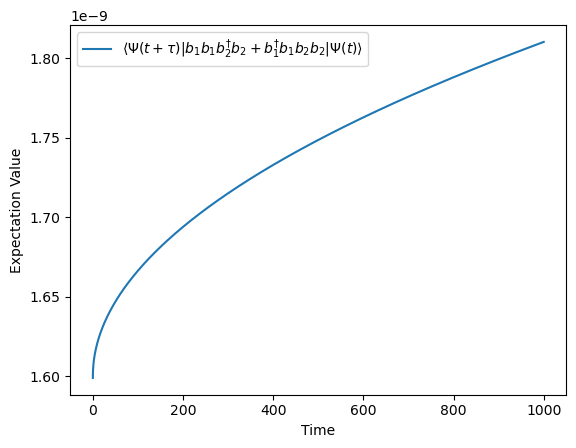

In [7]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 10  # Fock空间维度
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H = H0 + H1  # 哈密顿量
# Q1 = b1 * b1 * b2 * b2.dag()
Q2 = b1 * b1 * b2.dag() * b2 
# Q3 = b1 * b1.dag() * b2 * b2 
Q4 = b1.dag() * b1 * b2 * b2 

psi0 = tensor(basis(N, 0), basis(N, 0))  

# 定义时间范围和时间间隔
t_list2 = np.linspace(0, 1000, 10**4) # 时间范围
tau2 = 0.0001  # 时间间隔

# 计算随时间演化的期望值
expectation_values2 = []
possibility = []

for t2 in t_list2:
    result = mesolve(H, psi0, [t2, t2 + tau2], [Q2 + Q4])
    Ψ_t_plus_tau2 = result.states[-1]
    expectation_value2 = expect(Q2+Q4, Ψ_t_plus_tau2)
    possibility.append(np.vdot(expectation_value2,expectation_value2))
    expectation_values2.append(expectation_value2)

# 绘制结果
plt.plot(t_list2, expectation_values2, label=r'$\langle Ψ(t+\tau) | b_1b_1b_2^{\dagger}b_2+b_1^{\dagger}b_1b_2b_2 | Ψ(t) \rangle$')
# plt.plot(t_list2, possibility, label=r'$|\langle Ψ(t+\tau) | b_1b_1b_2^{\dagger}b_2 | Ψ(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()

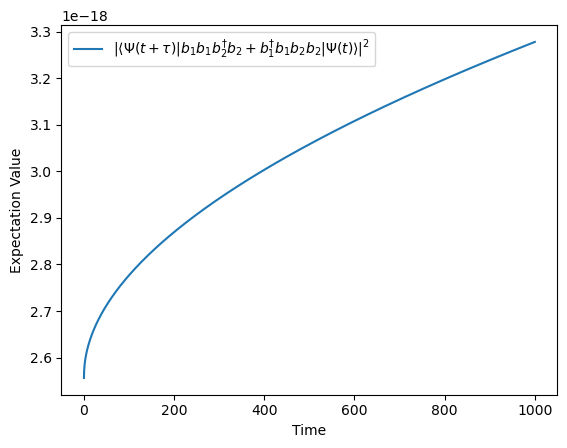

In [8]:
# 绘制结果
# plt.plot(t_list2, expectation_values2, label=r'$\langle Ψ(t+\tau) | b_1b_1b_2^{\dagger}b_2 | Ψ(t) \rangle$')
plt.plot(t_list2, possibility, label=r'$|\langle Ψ(t+\tau) | b_1b_1b_2^{\dagger}b_2+b_1^{\dagger}b_1b_2b_2 | Ψ(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()